<a href="https://colab.research.google.com/github/AidenHadisi/ml-journey/blob/main/p004_california_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [ ]:
from pathlib import Path

import kagglehub
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# Set global theme and styles for matplotlib and seaborn
sns.set_theme(style="whitegrid", palette="muted")
sns.set_context("notebook", font_scale=1.1)

# Configure matplotlib rcParams for better-looking plots
plt.rc("figure", figsize=(12, 6), titlesize=16)
plt.rc("axes", titlesize=14, labelsize=12, grid=True)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)
plt.rc("legend", fontsize=10)
plt.rc("grid", alpha=0.3)

In [ ]:
path = Path(kagglehub.dataset_download("rajathiagaraj/califronia-housing"))
df = pd.read_csv(path / "housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
# Check which columns contain missing values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# Check the skew of the data
# Shows heavy right skews for some columns such as total_rooms
df.skew(numeric_only=True)

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.459546
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


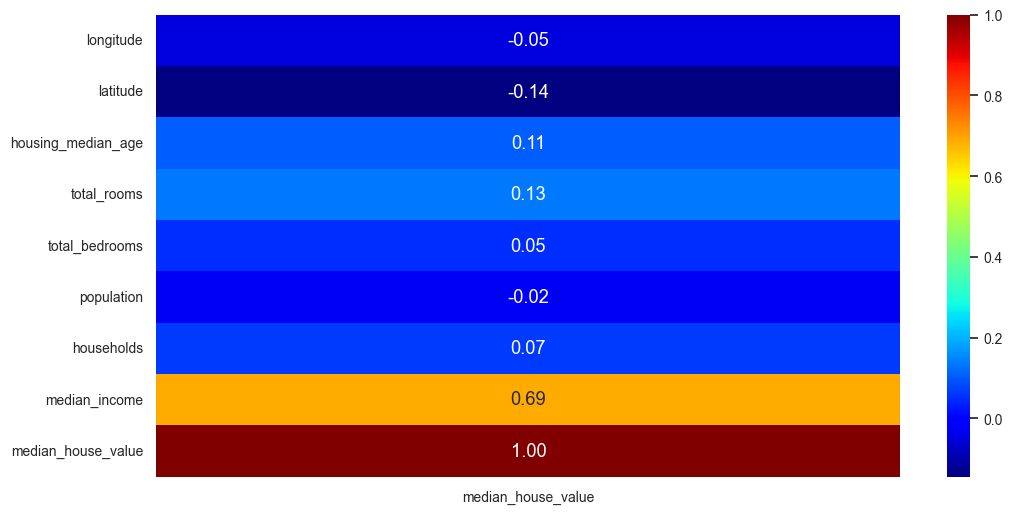

In [ ]:
corr = df.corr(numeric_only=True)["median_house_value"]
sns.heatmap(corr.to_frame(), cmap="jet", annot=True, fmt=".2f")
plt.show()

In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

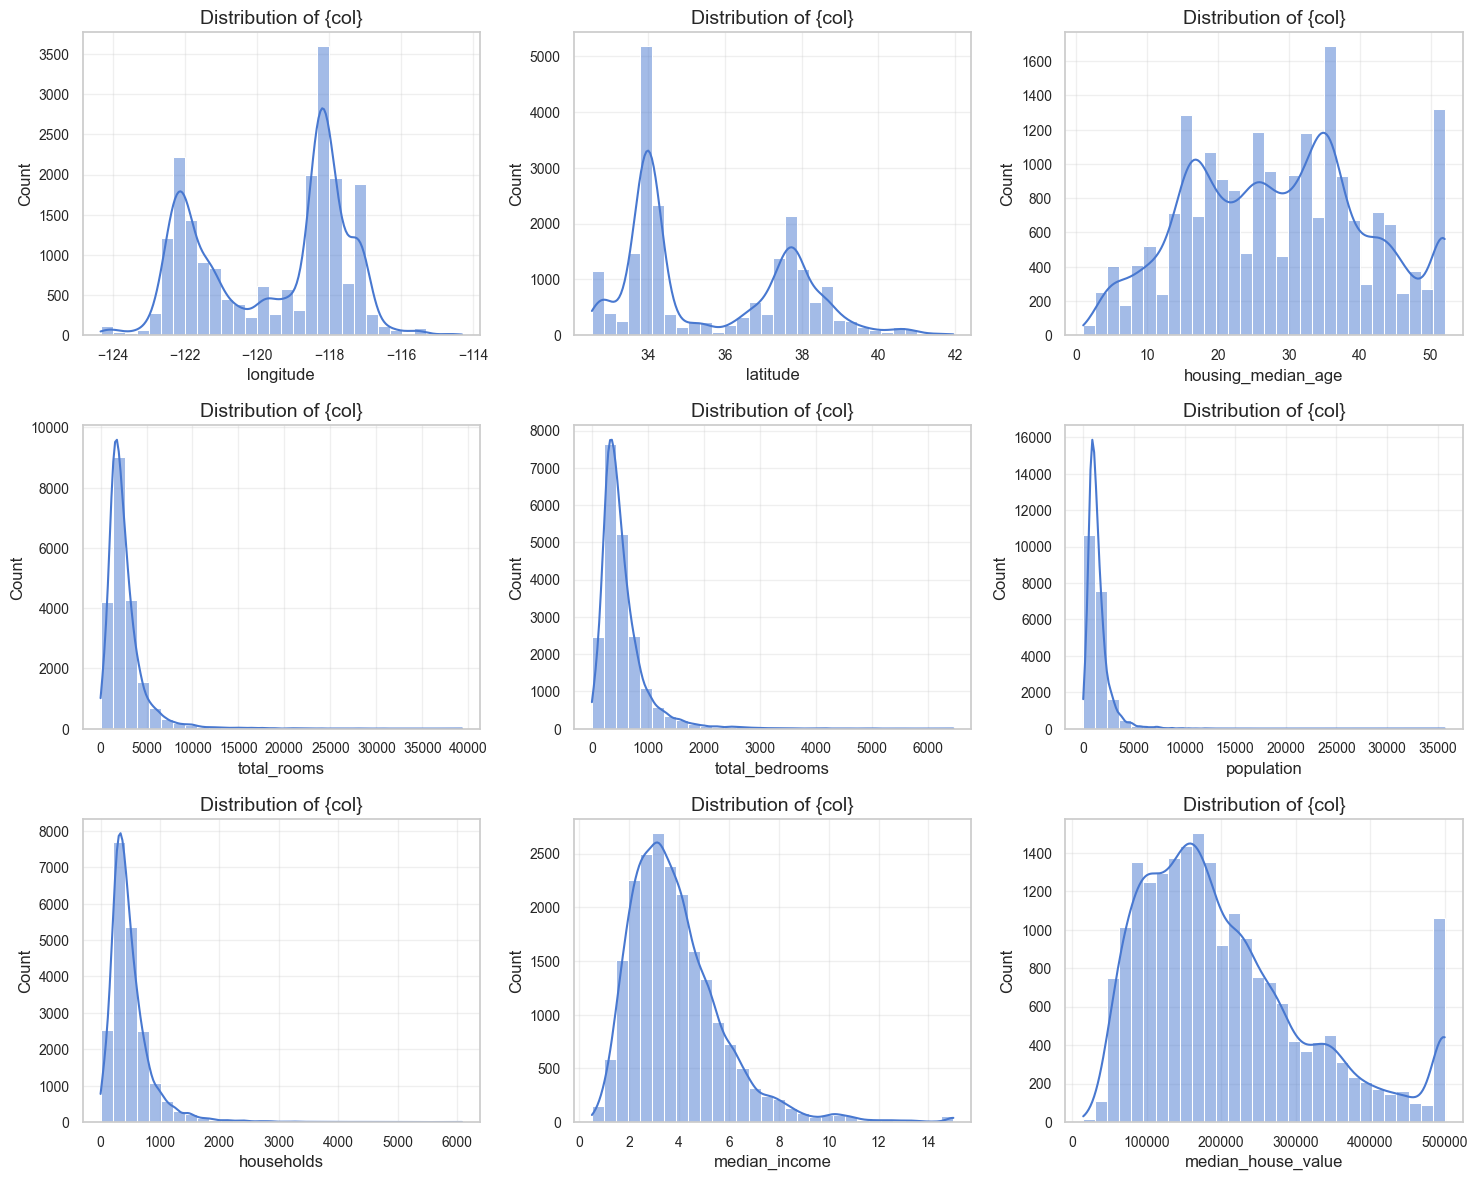

In [ ]:
numeric_cols = df.select_dtypes(include="number").columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for ax, col in zip(axes.flat, numeric_cols):
    sns.histplot(df, x=col, kde=True, bins=30, ax=ax)
    ax.set_title("Distribution of {col}")

plt.tight_layout()
plt.show()

In [ ]:
df["income_cat"] = pd.qcut(
    df["median_income"], q=5, labels=["very low", "low", "medium", "high", "very high"]
)

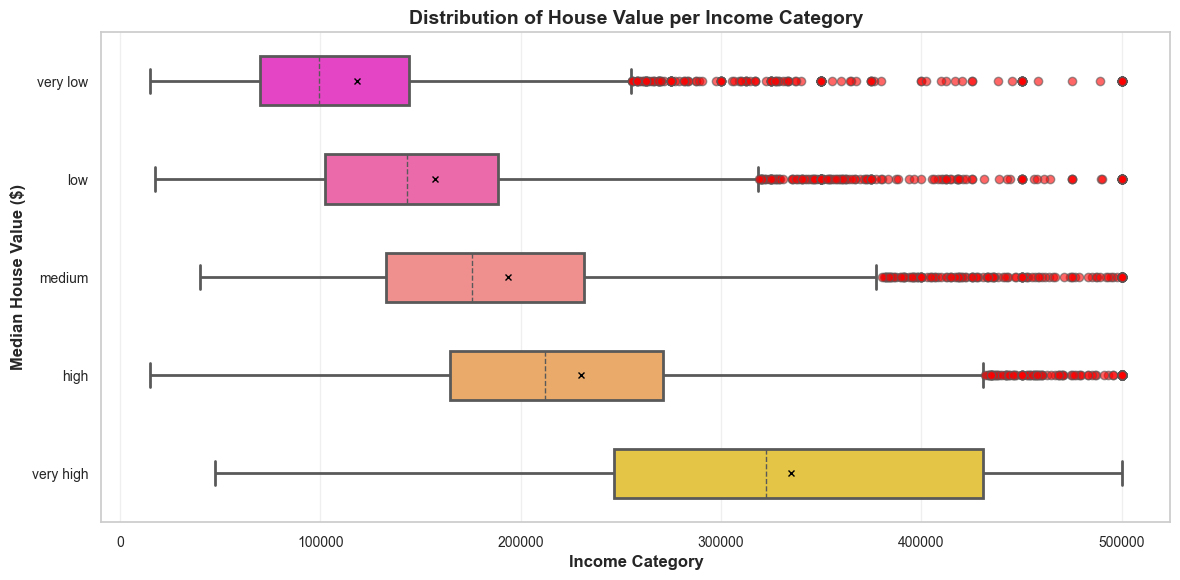

In [ ]:
from re import X

sns.boxplot(
    df,
    y="income_cat",
    x="median_house_value",
    hue="income_cat",
    palette="spring",
    linewidth=2,
    fliersize=4,
    showmeans=True,
    width=0.5,
    meanprops=dict(marker="x", markeredgecolor="black", markersize=4),
    medianprops=dict(linestyle="--", linewidth=1),
    flierprops=dict(marker="o", markerfacecolor="red", alpha=0.6, markersize=6),
)

plt.xlabel("Income Category", fontsize=12, fontweight="bold")
plt.ylabel("Median House Value ($)", fontsize=12, fontweight="bold")
plt.title(
    "Distribution of House Value per Income Category", fontsize=14, fontweight="bold"
)

plt.tight_layout()
plt.show()

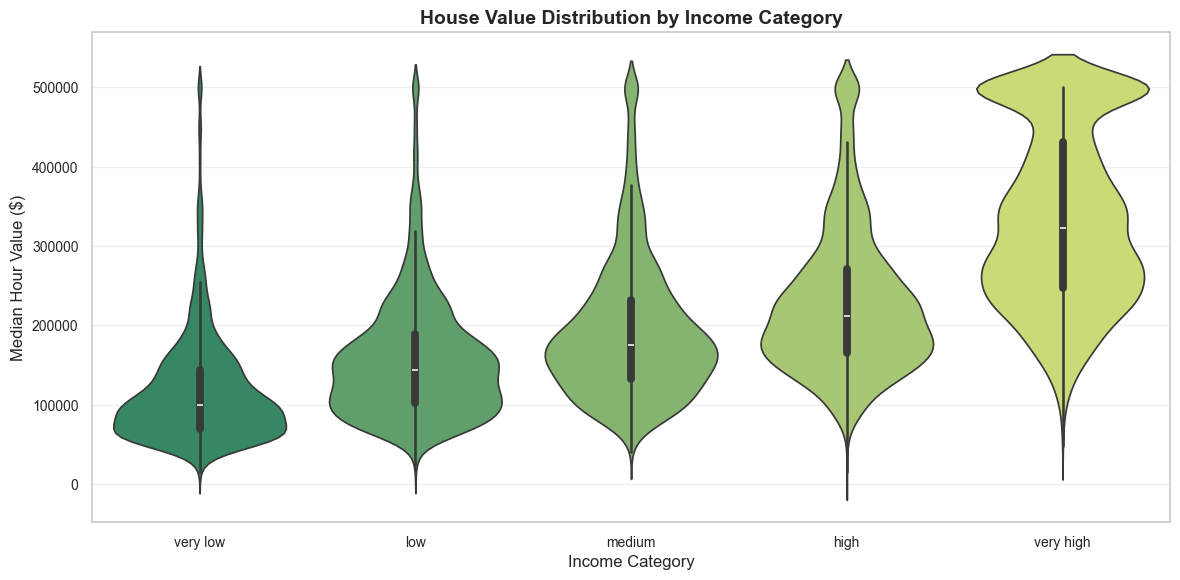

In [ ]:
sns.violinplot(
    data=df, x="income_cat", y="median_house_value", hue="income_cat", palette="summer"
)
plt.xlabel("Income Category")
plt.title("House Value Distribution by Income Category", fontsize=14, fontweight="bold")
plt.ylabel("Median Hour Value ($)")
plt.tight_layout()
plt.show()

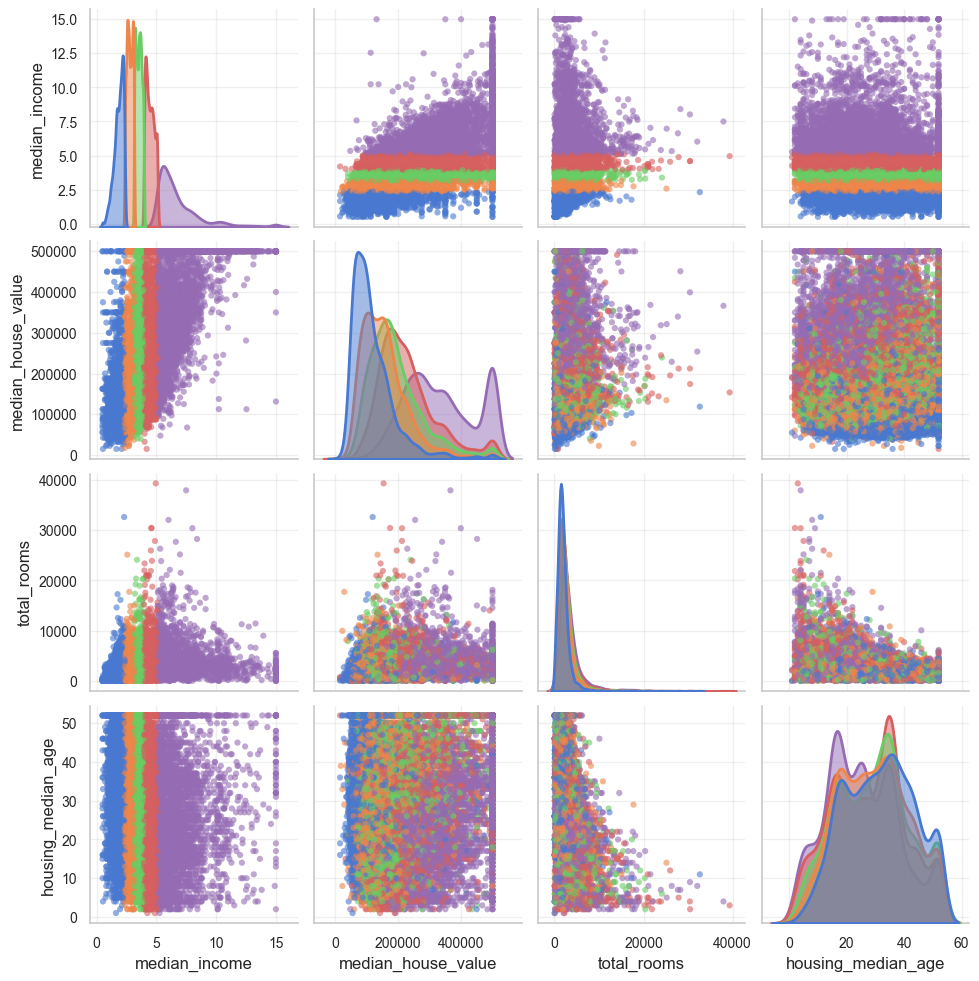

In [ ]:
g = sns.pairplot(
    df[
        [
            "median_income",
            "median_house_value",
            "total_rooms",
            "housing_median_age",
            "income_cat",
        ]
    ],
    diag_kind="kde",
    hue="income_cat",
    plot_kws=dict(alpha=0.6, s=20, edgecolor="none"),
    diag_kws=dict(linewidth=2, alpha=0.5, fill=True),
)
g.legend.remove() if g.legend else None
plt.show()

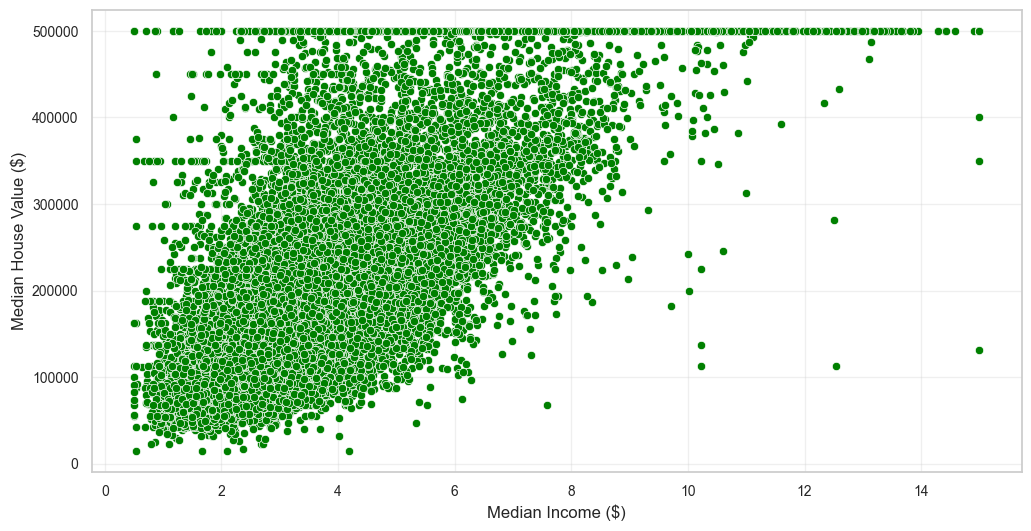

In [ ]:
sns.scatterplot(df, x="median_income", y="median_house_value", marker="o", c="green")
plt.xlabel("Median Income ($)")
plt.ylabel("Median House Value ($)")
plt.show()

In [ ]:
# Let's create some more features
df["rooms_per_house"] = df["total_rooms"] / df["households"]
df["bedrooms_ratio"] = df["total_bedrooms"] / df["total_rooms"]
df["people_per_house"] = df["population"] / df["households"]

In [ ]:
X = df.drop(columns="median_house_value")
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_house,bedrooms_ratio,people_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,very high,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,very high,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,very high,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,very high,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,medium,6.281853,0.172096,2.181467


In [ ]:
y = df["median_house_value"]
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df["income_cat"]
)

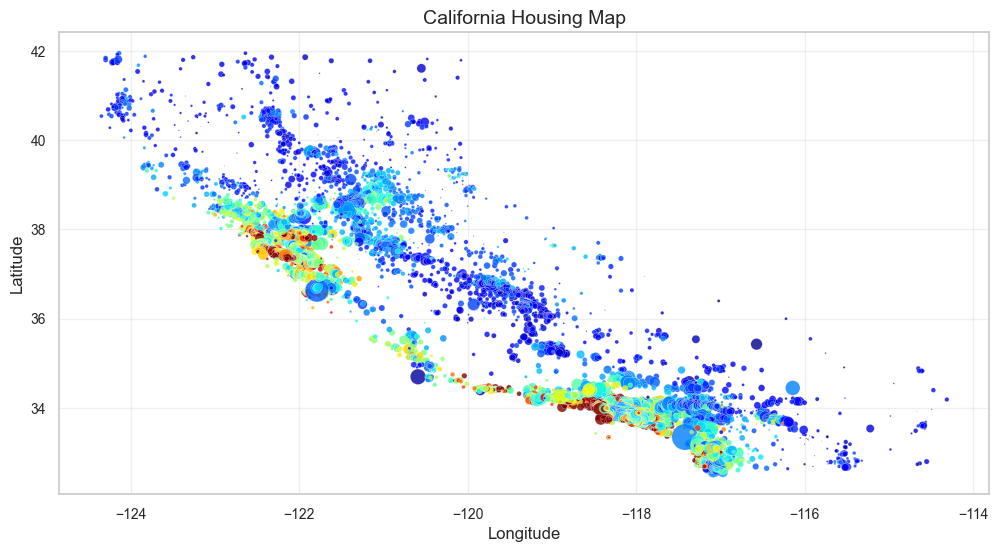

In [ ]:
sns.scatterplot(
    df,
    x="longitude",
    y="latitude",
    s=df["population"] / 100,
    c=df["median_house_value"],
    alpha=0.8,
    cmap="jet",
    legend=True,
)
plt.gca().set(xlabel="Longitude", ylabel="Latitude", title="California Housing Map")
plt.show()

In [ ]:
X_train.drop(columns="income_cat", inplace=True)
X_test.drop(columns="income_cat", inplace=True)

In [ ]:
# The things we need for the pipeline

# 1. Imputer to fill missing values
# 2. Scaler to scale values
# 3. Encoder to encode categorical values
# 4. The model to actaully train on values

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler

preprocessor = make_column_transformer(
    (
        make_pipeline(SimpleImputer(strategy="mean"), StandardScaler()),
        make_column_selector(dtype_include="number"),
    ),
    (
        make_pipeline(
            SimpleImputer(strategy="most_frequent"), OneHotEncoder(drop="first")
        ),
        ["ocean_proximity"],
    ),
)

linear_reg = make_pipeline(preprocessor, LinearRegression())
linear_reg.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('linearregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('pipeline-1', ...), ('pipeline-2', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of

In [ ]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

y_pred = linear_reg.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(
    f"""
RMSE: {rmse}
MAE: {mae}
"""
)


RMSE: 67462.73225372135
MAE: 48976.407240009714



In [ ]:
# Let's try a decision tree regressor instead

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=42))
rmses = cross_val_score(
    tree_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10
)


pd.Series(-rmses).describe()

count       10.000000
mean     70344.317233
std       2564.003844
min      65058.792876
25%      68867.503246
50%      70717.169877
75%      71782.786665
max      73959.967194
dtype: float64

In [ ]:
# Let's try a decision tree regressor instead
from sklearn.ensemble import RandomForestRegressor

tree_reg = make_pipeline(preprocessor, RandomForestRegressor(random_state=42))

rmses = cross_val_score(
    tree_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10
)


pd.Series(-rmses).describe()

count       10.000000
mean     50268.598498
std       1829.405107
min      47686.100325
25%      49235.184712
50%      49754.399972
75%      51799.686228
max      52899.845766
dtype: float64

In [27]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

# Define models with their parameter grids
models_config = [
    (
        "RandomForest",
        RandomForestRegressor(random_state=42),
        {
            "randomforestregressor__n_estimators": [50, 100, 200],
            "randomforestregressor__max_depth": [10, 20, None],
            "randomforestregressor__min_samples_split": [2, 5, 10],
            "randomforestregressor__min_samples_leaf": [1, 2, 4],
        },
    ),
    (
        "GradientBoosting",
        GradientBoostingRegressor(random_state=42),
        {
            "gradientboostingregressor__n_estimators": [50, 100, 200],
            "gradientboostingregressor__learning_rate": [0.01, 0.1, 0.2],
            "gradientboostingregressor__max_depth": [3, 5, 7],
            "gradientboostingregressor__min_samples_split": [2, 5, 10],
        },
    ),
    (
        "Ridge",
        Ridge(random_state=42),
        {
            "ridge__alpha": [0.1, 1.0, 10.0, 100.0],
        },
    ),
    (
        "Lasso",
        Lasso(random_state=42),
        {
            "lasso__alpha": [0.1, 1.0, 10.0, 100.0],
        },
    ),
    (
        "SVR",
        SVR(),
        {
            "svr__C": [0.1, 1.0, 10.0, 100.0],
            "svr__kernel": ["linear", "rbf"],
            "svr__gamma": ["scale", "auto"],
        },
    ),
]

# Train and evaluate all models
results = []
for name, model, params in models_config:
    print(f"Training {name}...")
    search = RandomizedSearchCV(
        make_pipeline(preprocessor, model),
        params,
        n_iter=15,
        cv=3,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1,
        random_state=42,
    )
    search.fit(X_train, y_train)
    results.append(
        {"Model": name, "RMSE": -search.best_score_, "Params": search.best_params_}
    )

# Display results
results_df = pd.DataFrame(results).sort_values("RMSE")
print("\n" + "=" * 80)
print(results_df.to_string(index=False))
print("=" * 80)
print(
    f"\n🏆 Best Model: {results_df.iloc[0]['Model']} (RMSE: {results_df.iloc[0]['RMSE']:,.2f})"
)

Training RandomForest...
Training GradientBoosting...
Training Ridge...


/Users/aidenhadisi/Code/ml-journey/.venv/lib/python3.13/site-packages/sklearn/model_selection/_search.py:324: UserWarning: The total space of parameters 4 is smaller than n_iter=15. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/aidenhadisi/Code/ml-journey/.venv/lib/python3.13/site-packages/sklearn/model_selection/_search.py:324: UserWarning: The total space of parameters 4 is smaller than n_iter=15. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Training Lasso...
Training SVR...


/Users/aidenhadisi/Code/ml-journey/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



           Model         RMSE                                                                                                                                                                                          Params
GradientBoosting 47567.559826 {'gradientboostingregressor__n_estimators': 200, 'gradientboostingregressor__min_samples_split': 5, 'gradientboostingregressor__max_depth': 5, 'gradientboostingregressor__learning_rate': 0.2}
    RandomForest 51109.929602             {'randomforestregressor__n_estimators': 200, 'randomforestregressor__min_samples_split': 5, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__max_depth': None}
           Lasso 68333.482848                                                                                                                                                                           {'lasso__alpha': 1.0}
           Ridge 68333.780832                                                                                  